# Using kernel principal component analysis for nonlinear mappings
- If we are dealing with nonlinear problems, which we may encounter rather frequently in real-world applications, linear transformation techniques for dimensionality reduction, such as PCA and LDA, may not be the best choice. In this section, we will take a look at a kernelized version of PCA a.k.a Kernel PCA. 
- Via kernel PCA we perform a nonlinear mapping that transforms the data onto a higher-dimensional space and use standard PCA in this higher-dimensional space to project the data back onto a lower-dimensional space where the samples can be separated by a linear classifier. - However, one downside of this approach is that it is computationally very expensive, and this is where we use the kernel trick. Using the kernel trick, we can compute the similarity between two high-dimension feature vectors in the original feature space.
- In other words, what we obtain after kernel PCA are the samples already projected onto the respective components rather than constructing a transformation matrix as in the standard PCA approach. Basically, the kernel function (or simply kernel) can be understood as a function that calculates a dot product between two vectors—a measure of similarity.
- The most commonly used kernels are as follows: Polynomial Kernel, The hyperbolic tangent (sigmoid) kernel, The Radial Basis Function (RBF) or Gaussian kernel that we will use in the following examples in the next subsection:

# Steps to implement kernel pca
- To summarize what we have discussed so far, we can define the following three steps to implement an RBF kernel PCA:

1. We compute the kernel (similarity) matrix Kernel functions and the kernel trick
2. We center the kernel matrix. 
3. We collect the top Kernel functions and the kernel trick eigenvectors of the centered kernel matrix based on their corresponding eigenvalues, which are ranked by decreasing magnitude. In contrast to standard PCA, the eigenvectors are not the principal component axes but the samples projected onto those axes.

At this point, you may be wondering why we need to center the kernel matrix in the second step. We previously assumed that we are working with standardized data, where all features have mean zero when we formulated the covariance matrix and replaced the dot products by the nonlinear feature combinations via Kernel functions and the kernel trick.Thus, the centering of the kernel matrix in the second step becomes necessary

# Implementing a kernel principal component analysis in Python

In [1]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]

    gamma: float
      Tuning parameter of the RBF kernel
    
    n_components: int
      Number of principal components to return

    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset   

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)
    
    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)

    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, -i] 
                            for i in range(1, n_components + 1)))

    return X_pc

One downside of using an RBF kernel PCA for dimensionality reduction is that we have to
specify the parameter Implementing a kernel principal component analysis in Python a priori. 
Finding an appropriate value for Implementing a kernel principal component analysis in 
Python requires experimentation and is best done using algorithms for parameter tuning, 
for example, grid search, which we will discuss in more detail in 
Chapter 6, Learning Best Practices for Model Evaluation and Hyperparameter Tuning.

# EXAMPLE 1 – SEPARATING HALF-MOON SHAPES
Now, let's apply our rbf_kernel_pca on some nonlinear example datasets. We will start by creating a two-dimensional dataset of 100 sample points representing two half-moon shapes:

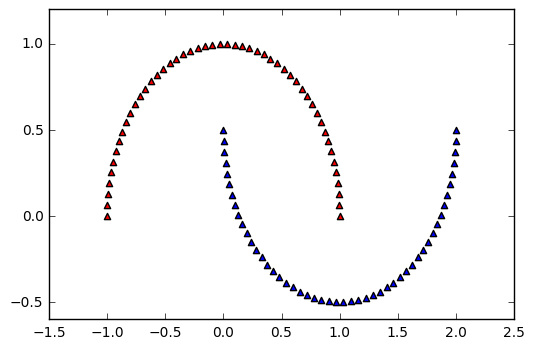

In [7]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0,0], X[y==0, 1], c='r', marker='^')
plt.scatter(X[y==1,0], X[y==1, 1], c='b', marker='^')
plt.show()

Clearly, these two half-moon shapes are not linearly separable and our goal is to
unfold the half-moons via kernel PCA so that the dataset can serve as a suitable
input for a linear classifier.
# But first, let's see what the dataset looks like if we project it onto the principal components via standard PCA:

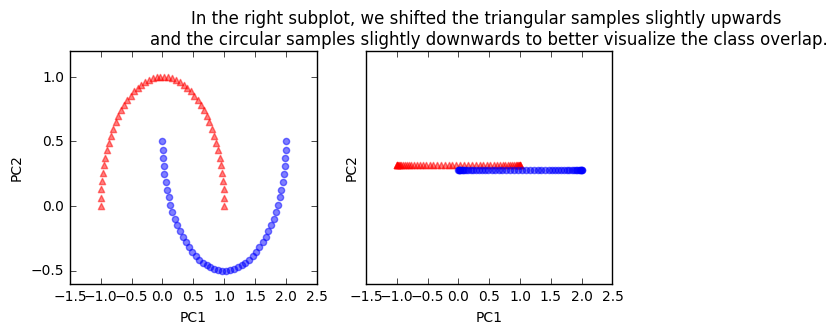

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))

ax[0].scatter(X[y==0,0], X[y==0,1], color='red', marker='^', alpha='0.5')
ax[0].scatter(X[y==1,0], X[y==1,1], color='blue', marker='o', alpha='0.5')
ax[1].scatter(X[y==0,0], np.zeros((50,1))+0.02, color='red', marker='^', alpha='0.5')
ax[1].scatter(X[y==1,0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha='0.5')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_title("In the right subplot, we shifted the triangular samples slightly upwards \nand the circular samples slightly downwards to better visualize the class overlap.")
plt.show()

# Now, let's try out our kernel PCA function rbf_kernel_pca, which we implemented in the previous subsection:

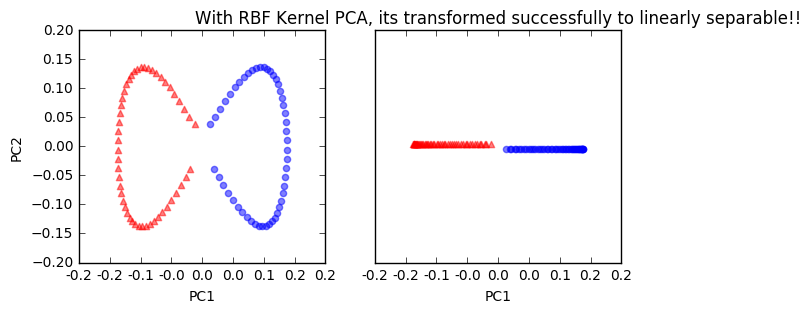

In [20]:
from matplotlib.ticker import FormatStrFormatter
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.title("With RBF Kernel PCA, its transformed successfully to linearly separable!!")
plt.show()

# Example2: Separating Concentric Circles

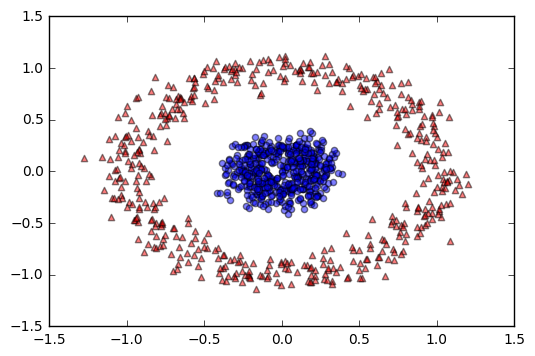

In [21]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1], marker='^', c='r', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b', alpha=0.5)
plt.show()

# But first, let's see what the dataset looks like if we project it onto the principal components via standard PCA:

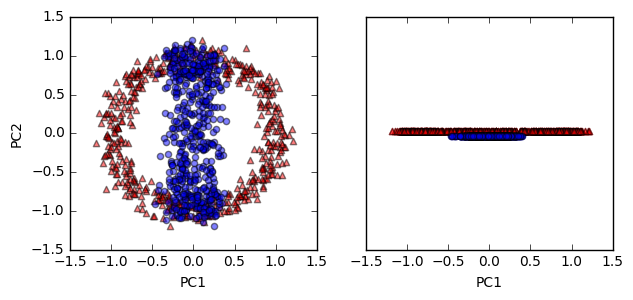

In [30]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
fig,ax= plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[1].scatter(X_pca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_pca[y==1, 0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].scatter(X_pca[y==0,0], X_pca[y==0, 1], c='r', marker='^', alpha=0.5)
ax[0].scatter(X_pca[y==1,0], X_pca[y==0, 1], c='b', marker='o', alpha=0.5)
ax[1].scatter(X_pca[y==0,0], np.zeros((500,1))+0.02, c='r', marker='^',alpha=0.5)
ax[1].scatter(X_pca[y==1,0], np.zeros((500,1))-0.02, c='b', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

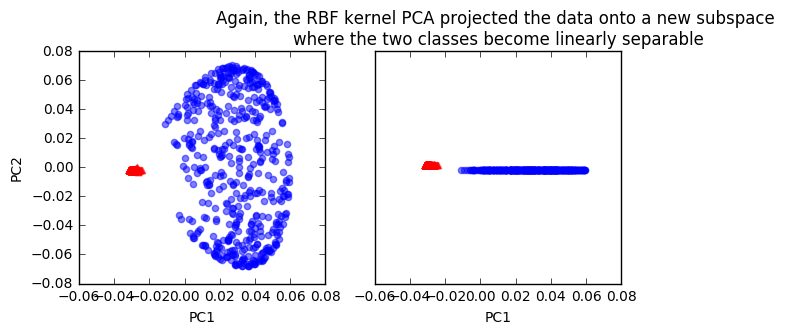

In [32]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.title('Again, the RBF kernel PCA projected the data onto a new subspace \nwhere the two classes become linearly separable')
plt.show()

# Kernel PCA via SciKit

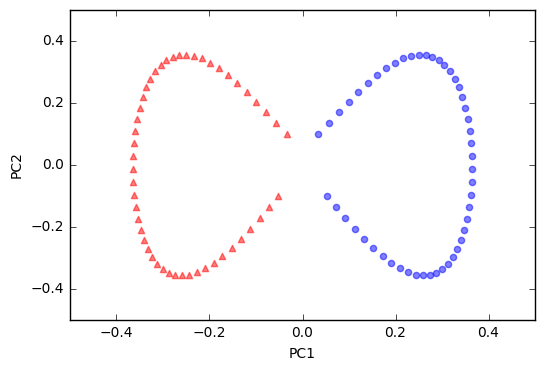

In [33]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()